# Concrete Compressive Strength

## Dataset Description

This dataset contains detailed information about the components of concrete, their respective quantities, and the compressive strength of the concrete 
(This Dataset from Kaggle)

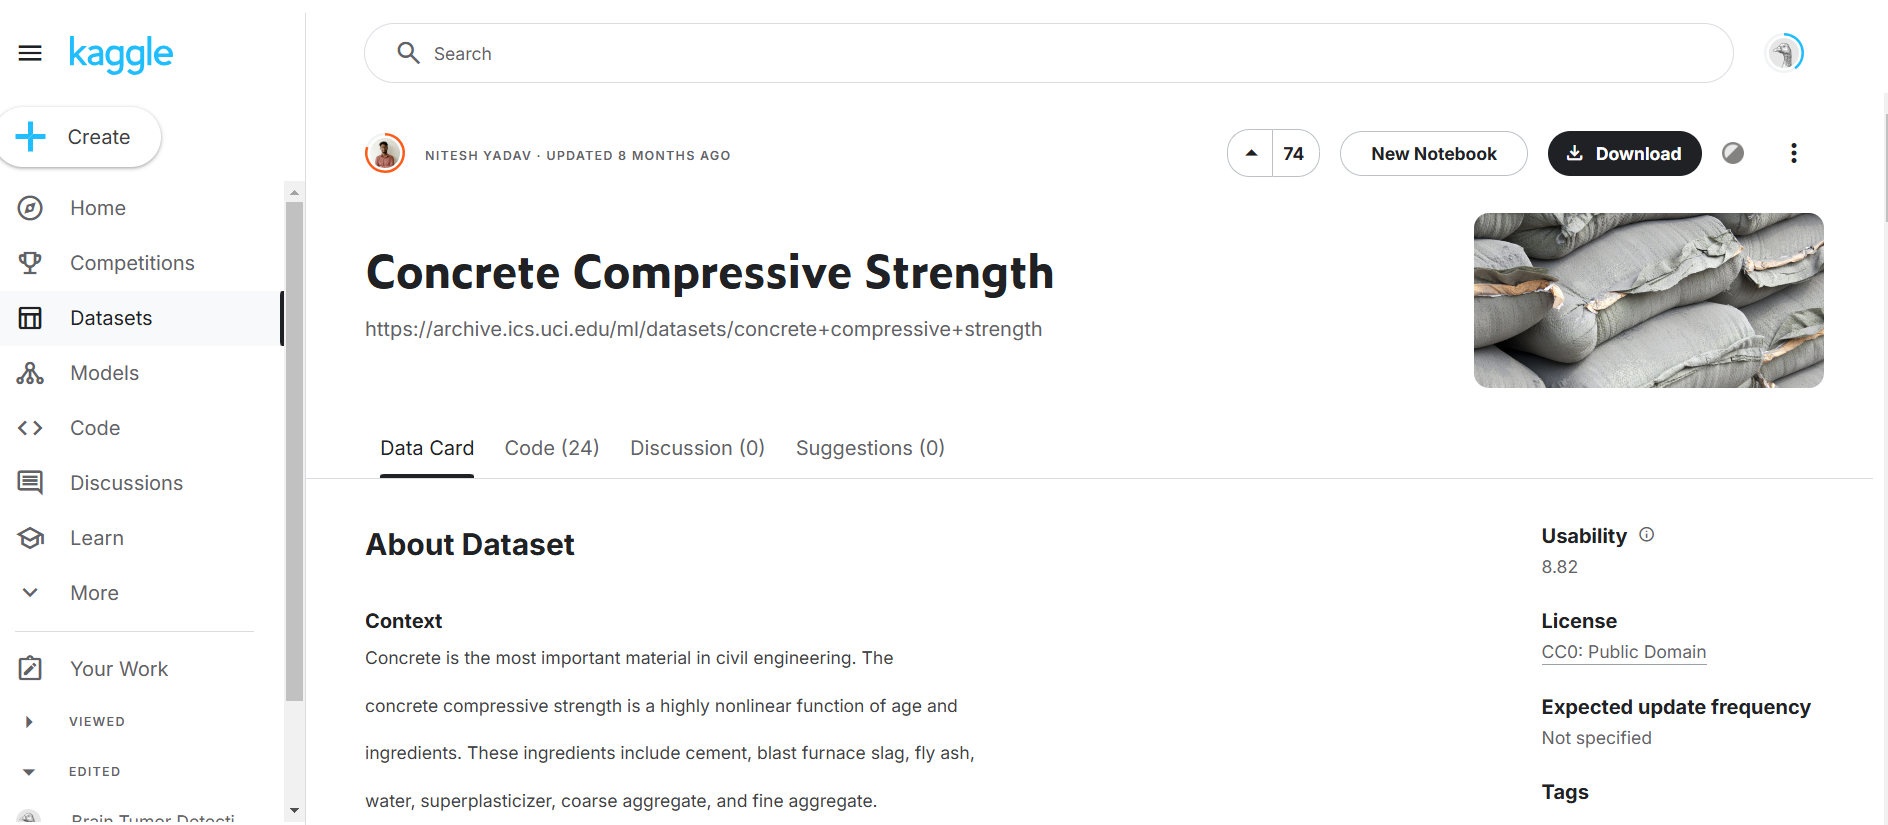
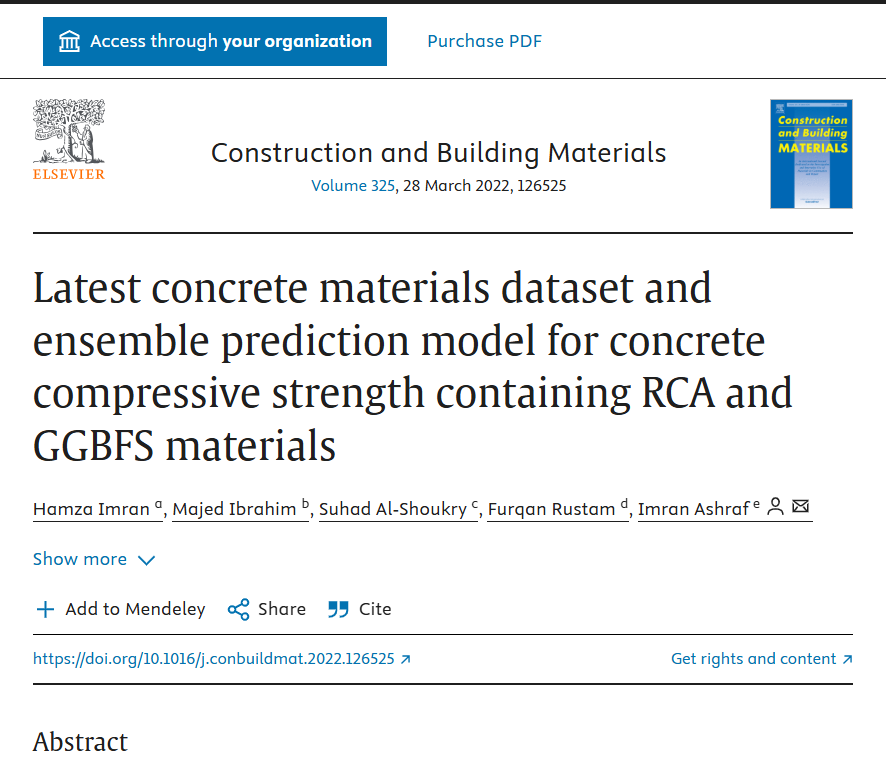

### Features in the Dataset
- **Cement**: Amount of cement used (in kg/m³)
- **Blast Furnace Slag**: Amount of blast furnace slag used (in kg/m³)
- **Fly Ash**: Amount of fly ash used (in kg/m³)
- **Water**: Amount of water used (in kg/m³)
- **Superplasticizer**: Amount of superplasticizer used (in kg/m³)
- **Coarse Aggregate**: Amount of coarse aggregate used (in kg/m³)
- **Fine Aggregate**: Amount of fine aggregate used (in kg/m³)
- **Age (days)**: Number of days the concrete was left to cure

### Target in the Dataset
- **Concrete Compressive Strength**: The final compressive strength of the concrete (in MPa)




---




<center>import libraries</center>

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

<center>import Dataset</center>

In [138]:
df=pd.read_csv("Concrete compressive strength.csv")
df


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


 <center>Understanding data</center>

In [139]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [140]:
df.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [141]:
df.shape


(1030, 9)

In [142]:
df.columns = df.columns.str.strip()

In [143]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [144]:
print("Statistical summary of numeric features:")
df.describe()

Statistical summary of numeric features:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [145]:
df['Concrete compressive strength'].value_counts()


Concrete compressive strength
33.398217    5
77.297154    4
31.350474    4
71.298713    4
35.301171    4
            ..
56.633559    1
26.048403    1
30.219733    1
16.278528    1
32.401235    1
Name: count, Length: 938, dtype: int64

  <center>Exploratory Data Analysis (EDA) </center>


In [146]:
duplicates = df[df.duplicated()]
print(duplicates)

     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0   

In [147]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 25


In [148]:
df = df.drop_duplicates()

In [149]:
df.shape

(1005, 9)

In [150]:
df.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age (day)                        False
Concrete compressive strength    False
dtype: bool

<center>Data Visualization  </center>


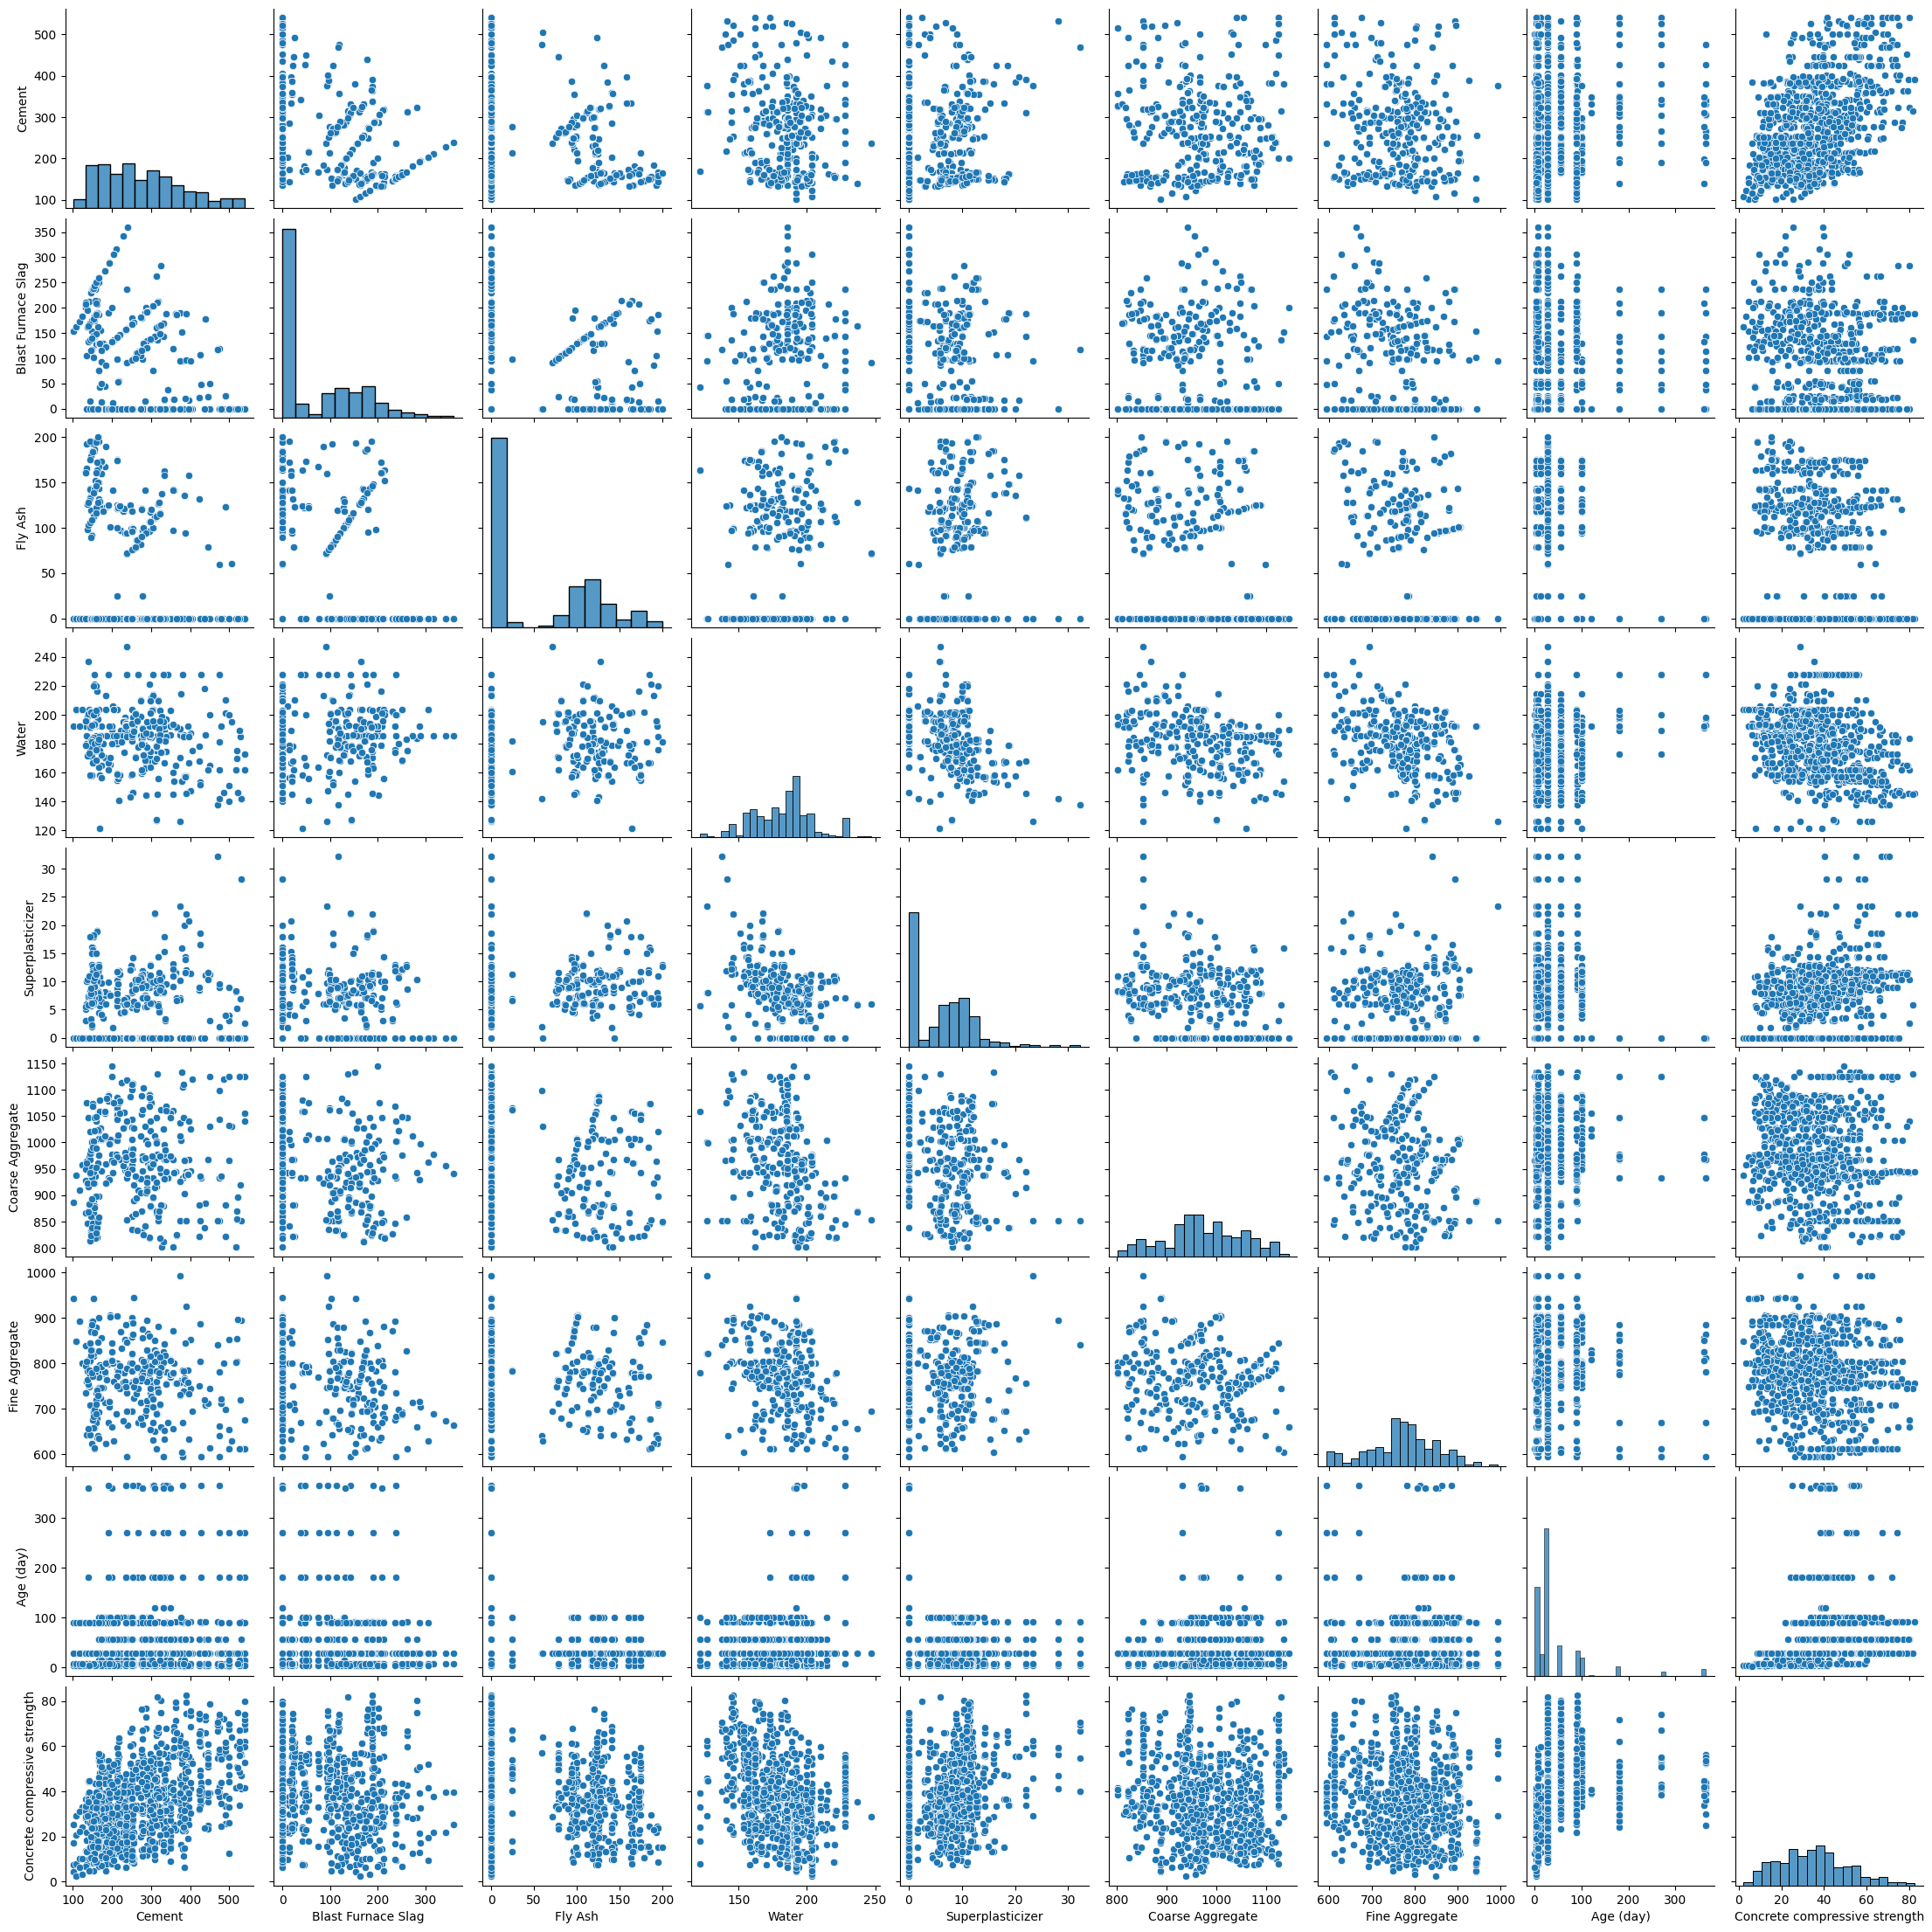

In [151]:
sns.pairplot(df)
plt.show()

In [152]:
data = df['Concrete compressive strength'].tolist()
fig = go.Figure(go.Histogram(x=data, nbinsx=10, marker_color='#204f6b'))
fig.update_layout(title='Histogram of Strength',xaxis_title='Strength Values',yaxis_title='Frequency')
fig.show()

Index([], dtype='object')


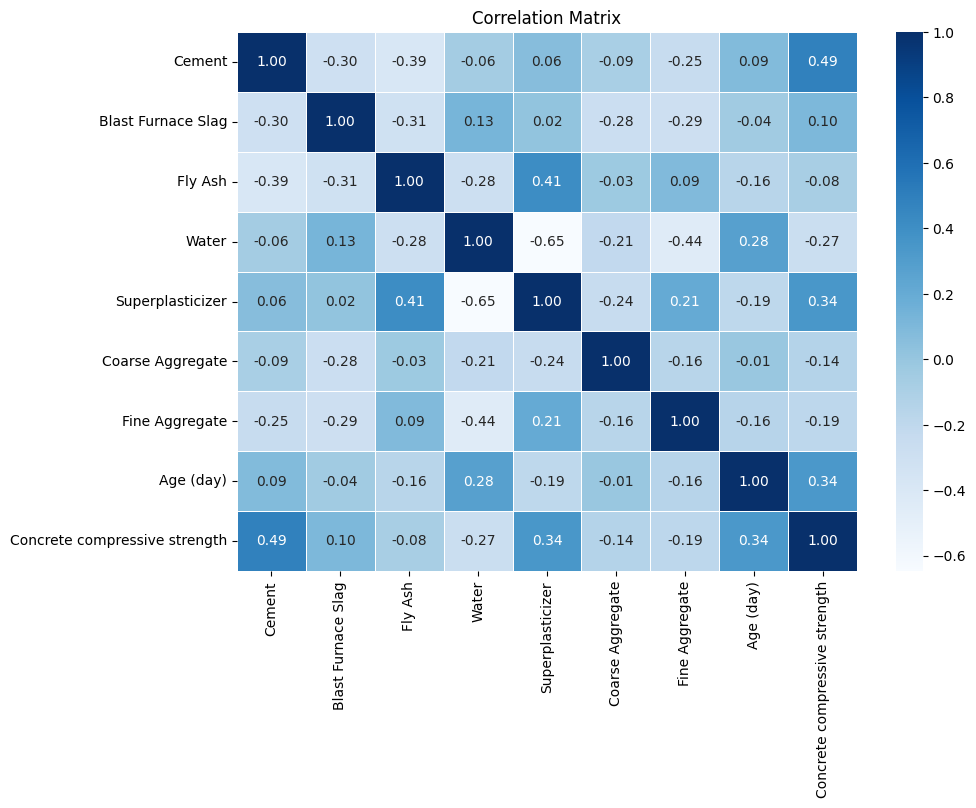

In [153]:
interval_cols = df.select_dtypes(include='interval').columns
print(interval_cols)
num_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix,annot=True,cmap="Blues",fmt=".2f",linewidths=0.5,)
plt.title('Correlation Matrix')
plt.show()

Distribution of Each Variable

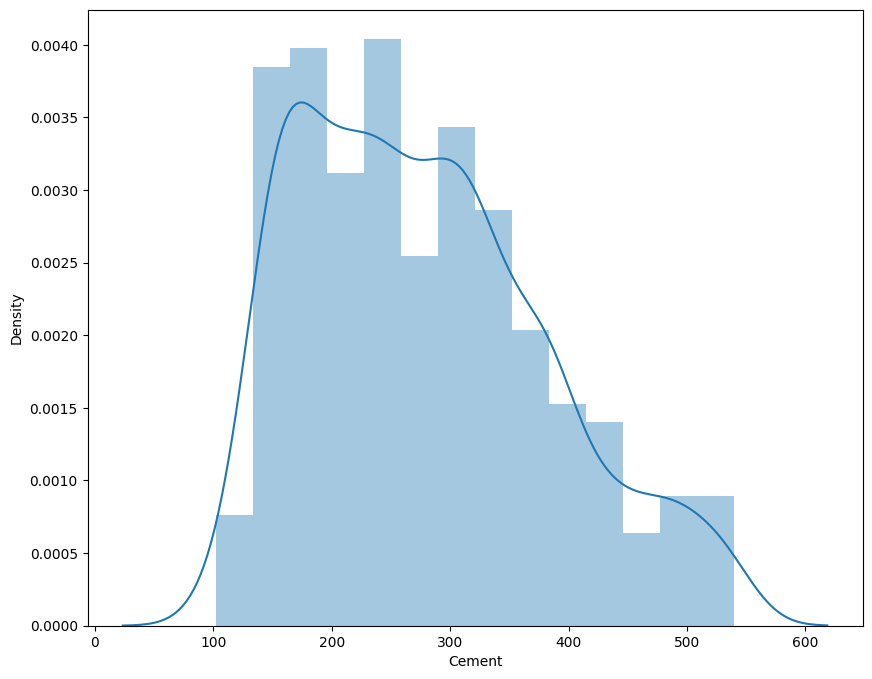

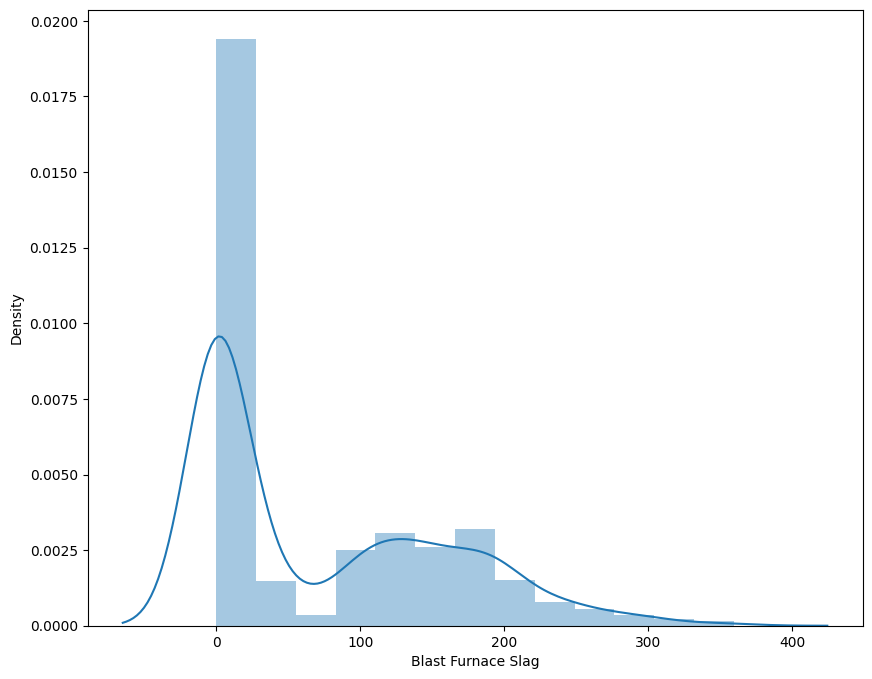

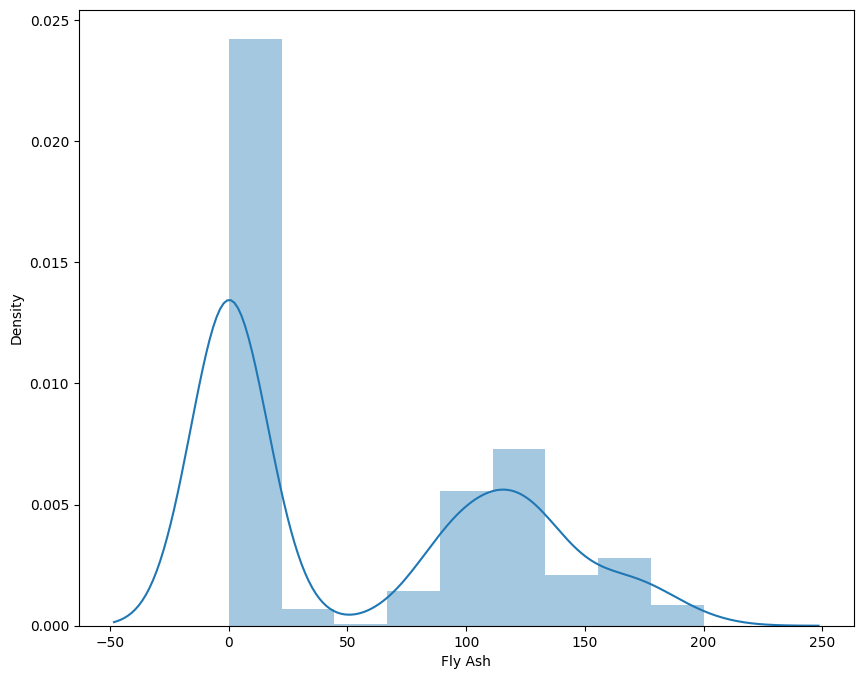

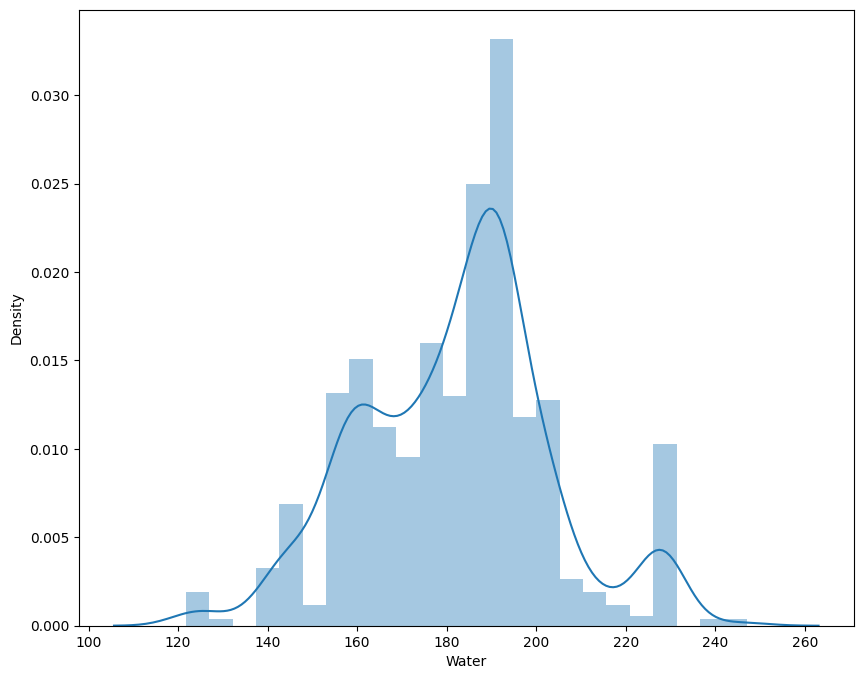

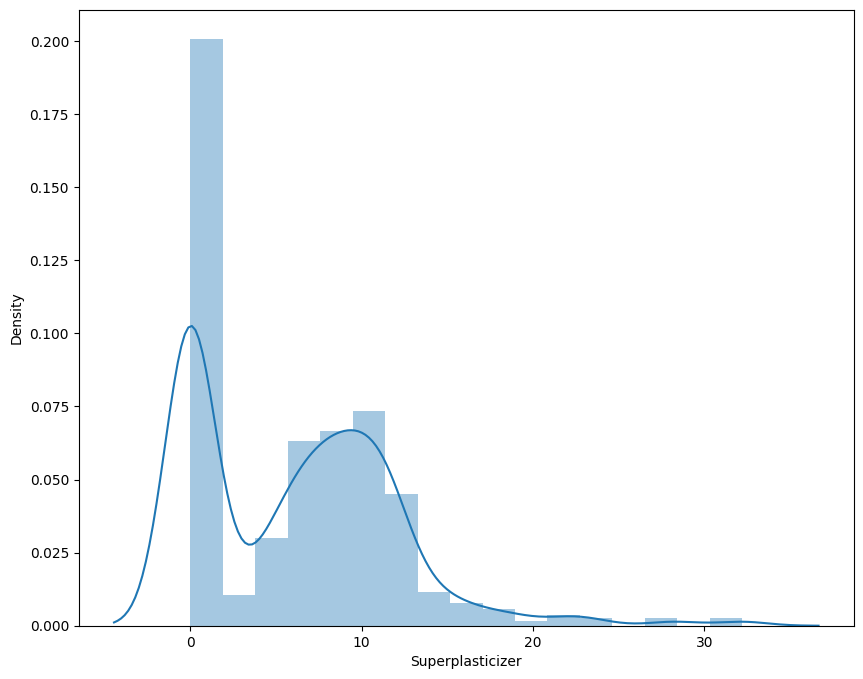

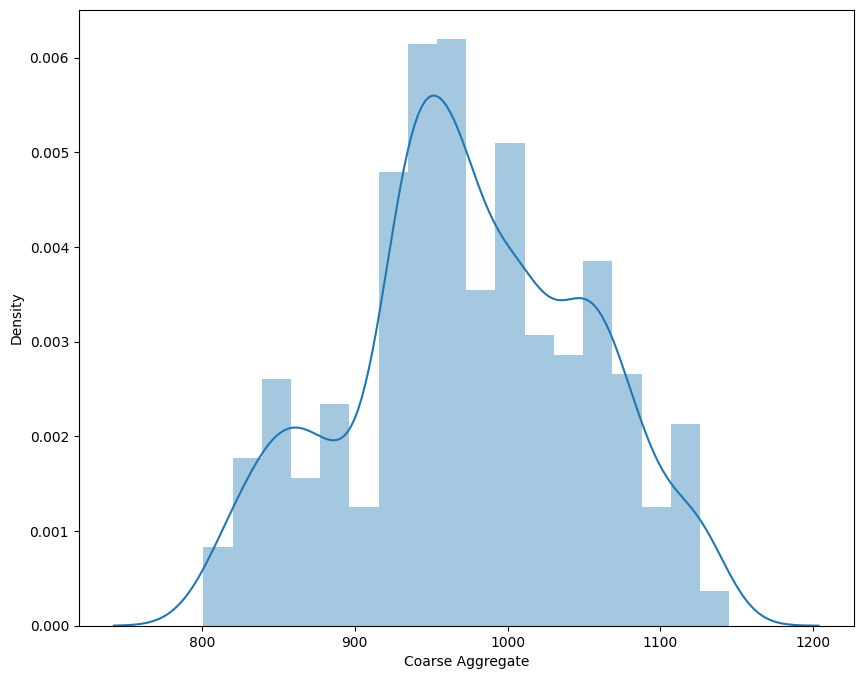

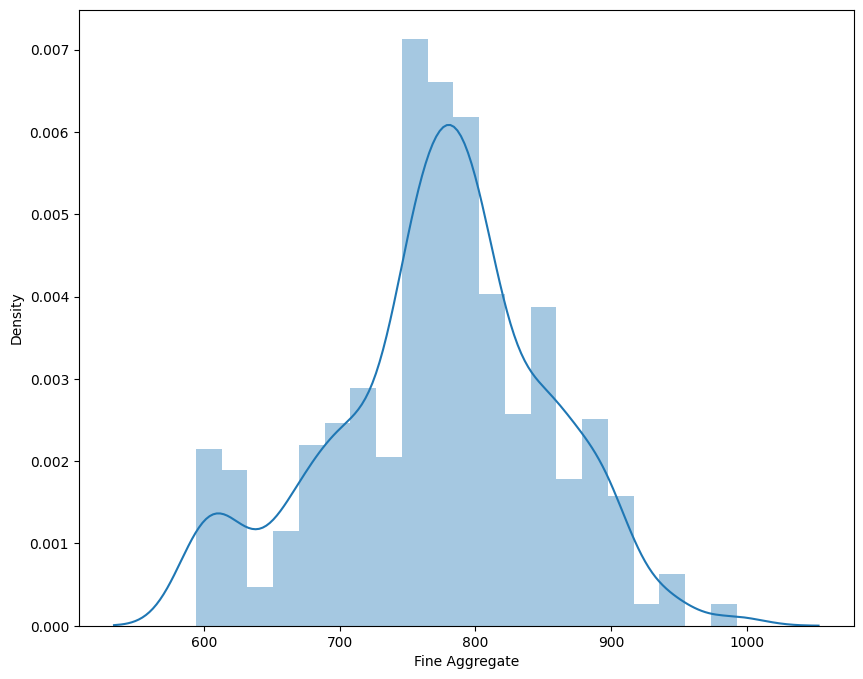

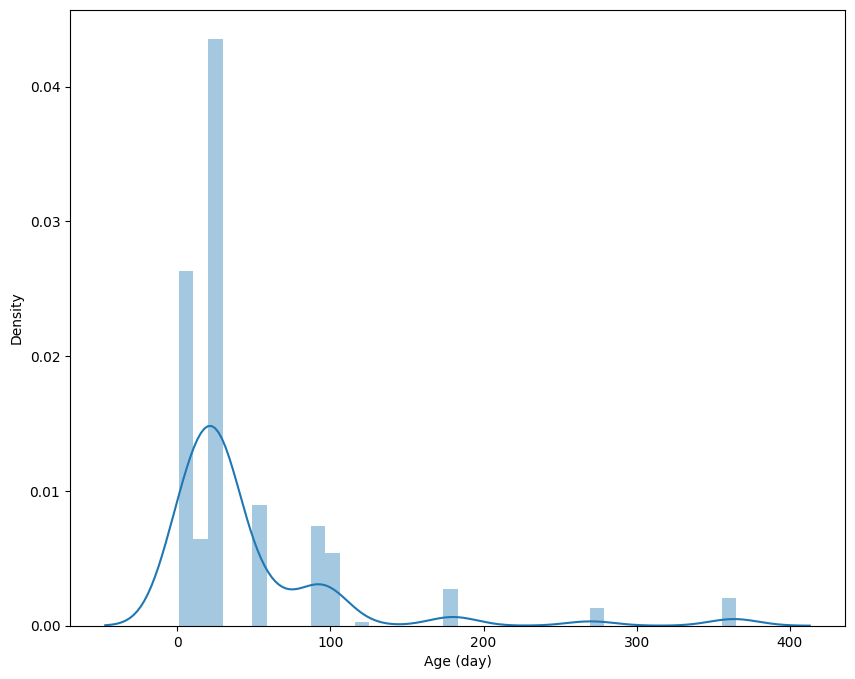

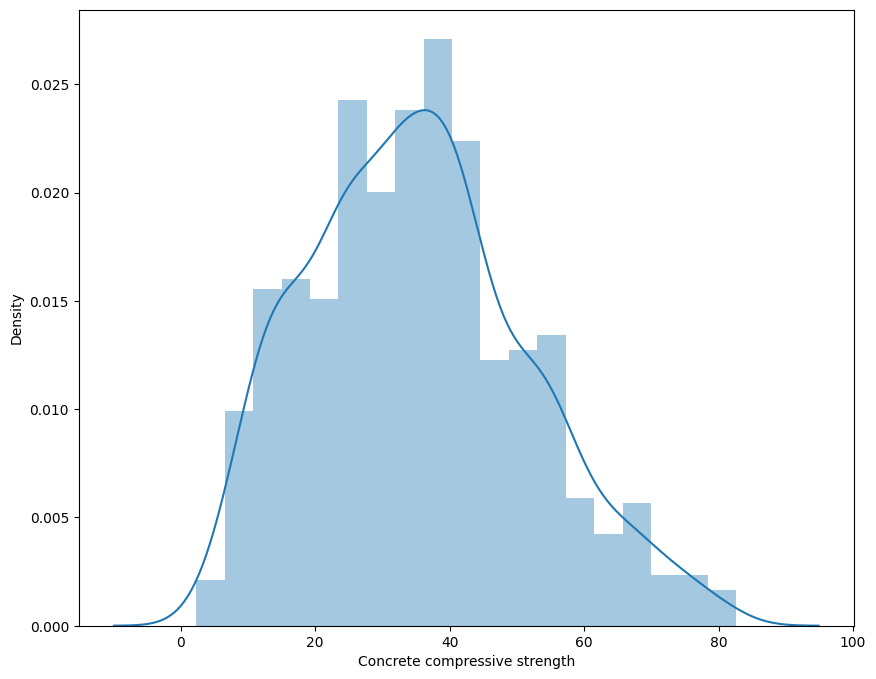

In [154]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

  <center>Data Cleaning </center>


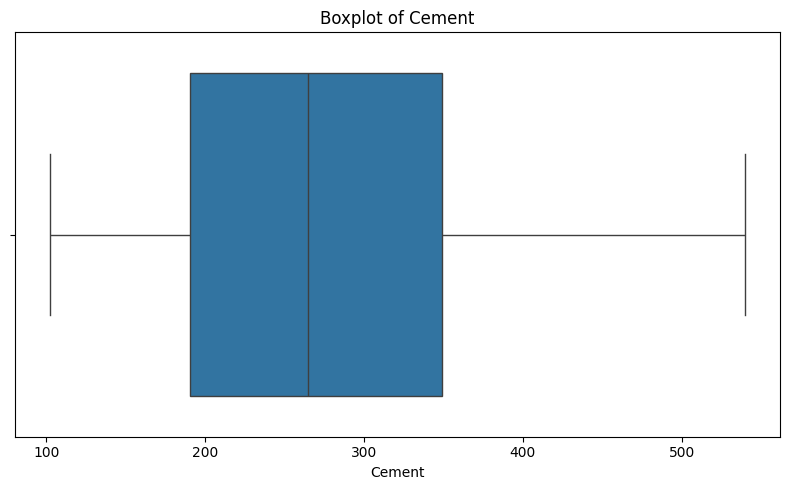

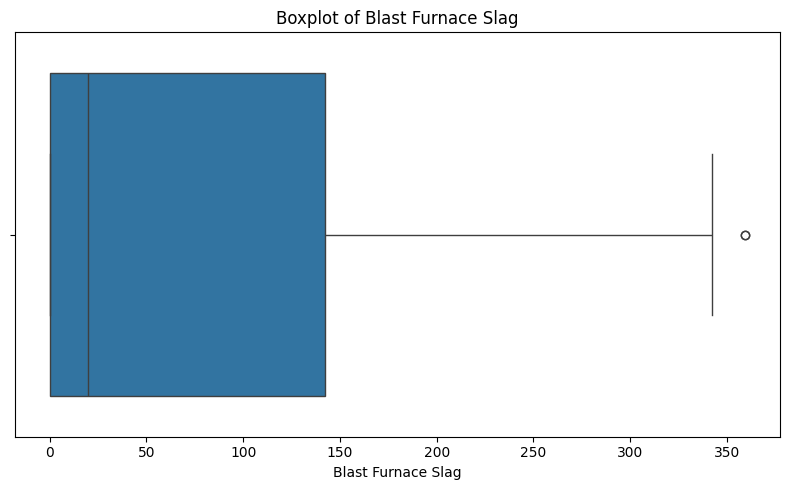

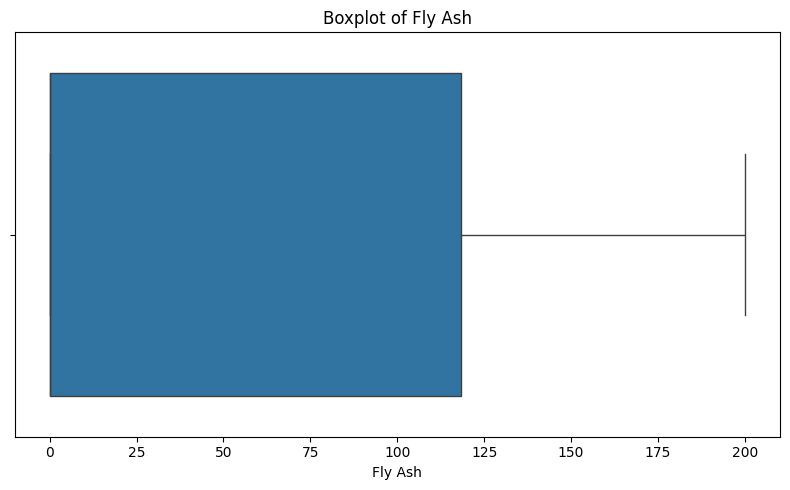

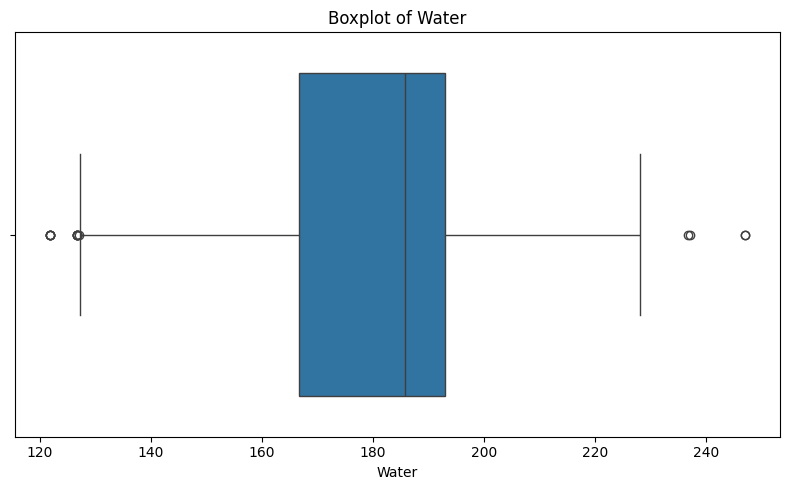

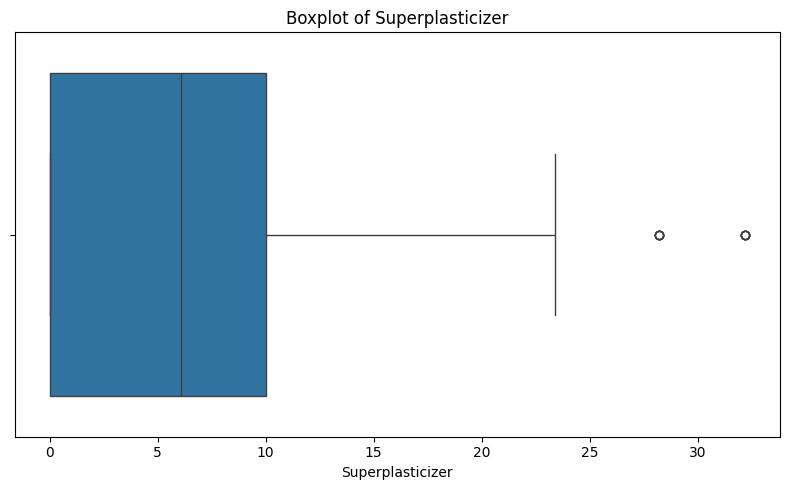

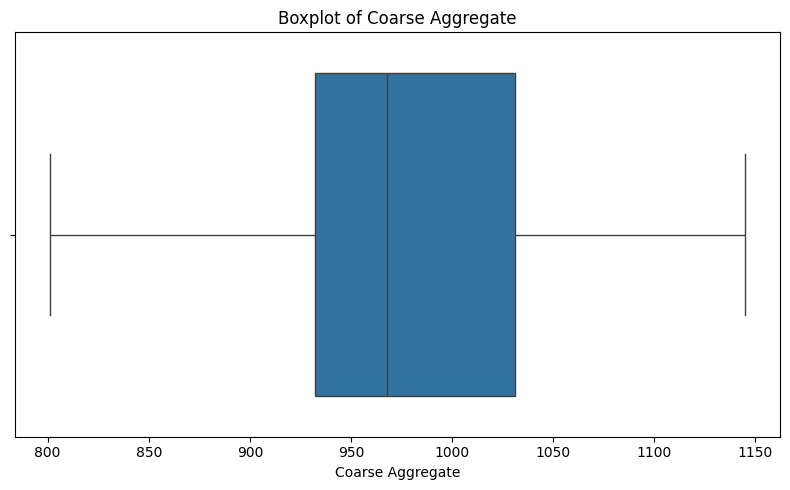

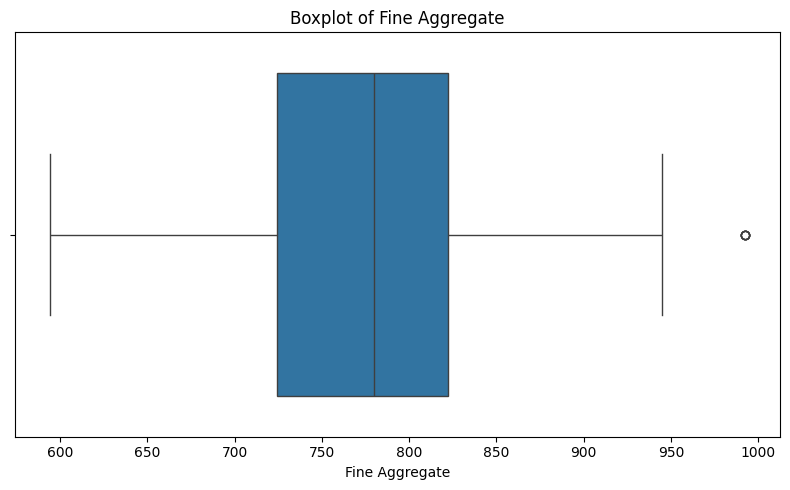

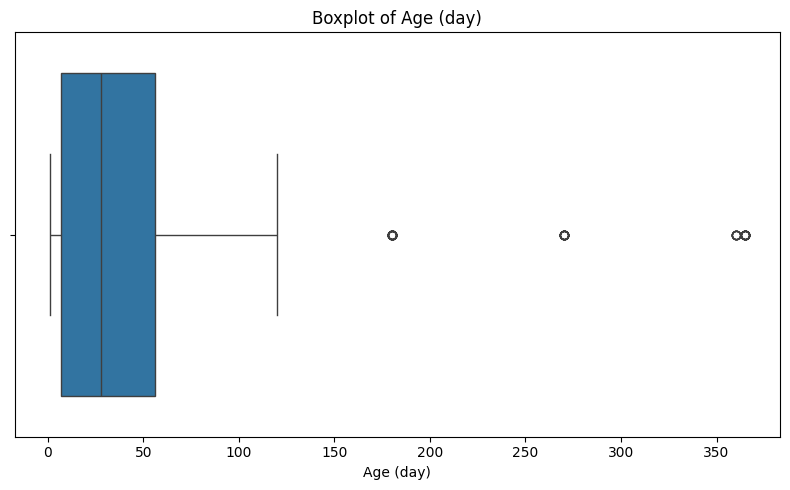

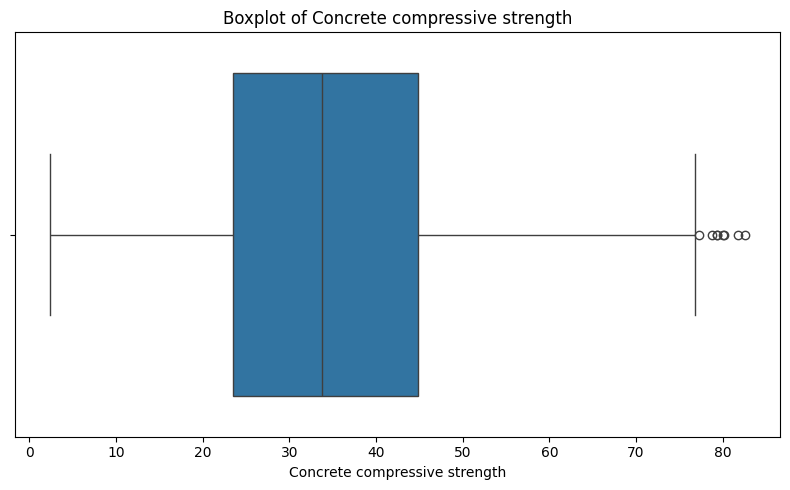

In [155]:
for col in df.columns:
    plt.figure(figsize=(8, 5))  
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [156]:
outlier_cols = [ 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate']
for col in outlier_cols:
    df[col] = np.log10(df[col] + 1)

In [157]:
scaler = StandardScaler()

Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:


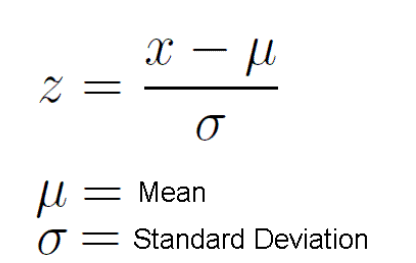

In [158]:
X =df.drop(columns=['Concrete compressive strength'])  
y = df['Concrete compressive strength']

In [159]:
X = scaler.fit_transform(X) 

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [162]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# **Modeling by Machine Learning**

In [163]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])



**LinearRegression**

In [164]:
lin_reg = LinearRegression()

In [165]:
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)
new_row = pd.DataFrame([{
    "Model": "LinearRegression",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])
models = pd.concat([models, new_row], ignore_index=True)

MAE: 8.683121870900775
MSE: 121.19184749861145
r2 Score: 0.5937632978451237
RMSE (Cross Validated): 10.753750929036347


**Lasso (L1 Regularization)**

In [166]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "Lasso",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])

models = pd.concat([models, new_row], ignore_index=True)

MAE: 9.097989653401617
MSE: 133.50928874913416
r2 Score: 0.5524750691739986
RMSE (Cross Validated): 10.919456885830018


**Ridge (L2 Regularization)**

In [167]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)
mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)

print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "Ridge",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])

models = pd.concat([models, new_row], ignore_index=True)


MAE: 8.685021475399093
MSE: 121.2165412194974
r2 Score: 0.5936805241607241
RMSE (Cross Validated): 10.749184326051282


**Support Vector Machines**

In [168]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "SVR",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])

models = pd.concat([models, new_row], ignore_index=True)


MAE: 8.272308146869356
MSE: 115.94199778735677
r2 Score: 0.6113608646578028
RMSE (Cross Validated): 11.597937339513807


**Random Forest**

In [169]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "RandomForestRegressor",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])
models = pd.concat([models, new_row], ignore_index=True)


MAE: 3.473213356468318
MSE: 27.37947107107382
r2 Score: 0.9082236448719432
RMSE (Cross Validated): 10.278137337171254


**XGBoost**

In [170]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "XGBRegressor",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])

models = pd.concat([models, new_row], ignore_index=True)


MAE: 2.738200859575628
MSE: 20.59653227918704
r2 Score: 0.9309601468942102
RMSE (Cross Validated): 9.640516540610347


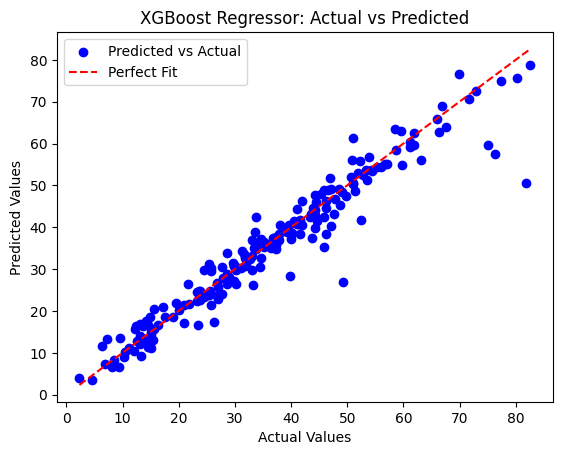

In [171]:
plt.scatter(y_test, predictions, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('XGBoost Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


**XGBRegressor & Grid Search**


In [172]:
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],            
    'subsample': [0.7, 0.8, 1.0],      
    'colsample_bytree': [0.7, 0.8, 1.0] 
}

grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    cv=5,                
    scoring='neg_mean_squared_error',  
    verbose=1, 
    n_jobs=-1         
)

grid_search.fit(X_train, y_train)
print("best parameters:", grid_search.best_params_)


best_xgb = grid_search.best_estimator_
predictions = best_xgb.predict(X_test)
mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(best_xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = pd.DataFrame([{
    "Model": "XGBRegressor (GridSearch)",
    "MAE": mae,
    "MSE": mse,
    "r2 Score": r2,
    "RMSE (Cross Validated)": rmse
}])

models = pd.concat([models, new_row], ignore_index=True)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
MAE: 2.8279027302391424
MSE: 19.784009343919404
r2 Score: 0.9336837346970294
RMSE (Cross Validated): 9.170119396773961


**Model Comparison**


In [173]:
models.sort_values(by="RMSE (Cross Validated)")


,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
6,XGBRegressor (GridSearch),2.827903,19.784009,0.933684,9.170119
5,XGBRegressor,2.738201,20.596532,0.930960,9.640517
4,RandomForestRegressor,3.473213,27.379471,0.908224,10.278137
2,Ridge,8.685021,121.216541,0.593681,10.749184
0,LinearRegression,8.683122,121.191847,0.593763,10.753751
1,Lasso,9.097990,133.509289,0.552475,10.919457
3,SVR,8.272308,115.941998,0.611361,11.597937


In [174]:

new_data = [
    [540, 162, 2.5, 1040, 676, 28, 10, 25], 
    [1, 2, 3, 4, 5, 6, 7, 8]
]

new_data_array = np.array(new_data)

new_predictions = best_xgb.predict(new_data_array)
print("Predictions for new data:", new_predictions)

Predictions for new data: [70.35401  61.858093]


# save best model 

In [175]:
import pickle
pickle.dump(best_xgb,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))